In [1]:
# In this project i will try to build machine learnng model to detected credit card fraud.

In [2]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns

In [3]:
data=pd.read_csv(r"../input/abstract-data-set-for-credit-card-fraud-detection/creditcardcsvpresent.csv")

In [4]:
data.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [5]:
# my target variables is "isFradulent"

In [6]:
# copy 
df=data.copy()

In [7]:
# shape for my data
df.shape


(3075, 12)

In [8]:
# we have 3075 lines and 12 columns

In [9]:
# columns
df.columns

Index(['Merchant_id', 'Transaction date', 'Average Amount/transaction/day',
       'Transaction_amount', 'Is declined', 'Total Number of declines/day',
       'isForeignTransaction', 'isHighRiskCountry', 'Daily_chargeback_avg_amt',
       '6_month_avg_chbk_amt', '6-month_chbk_freq', 'isFradulent'],
      dtype='object')

In [10]:
 # missing values
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [11]:
# data types
df.dtypes.value_counts()

int64      4
float64    4
object     4
dtype: int64

In [12]:
# qualitative variables
for col in df.select_dtypes("object"):
    print(col)

Is declined
isForeignTransaction
isHighRiskCountry
isFradulent


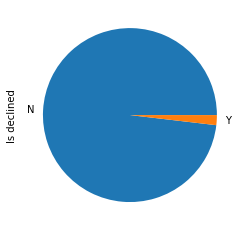

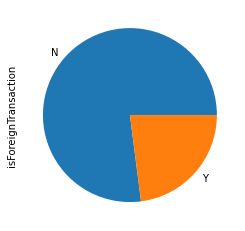

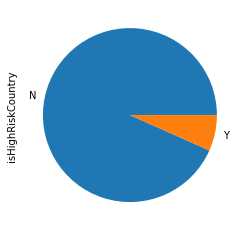

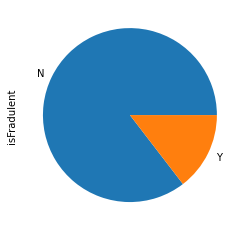

In [13]:
# visualize qualitative variables
for col in df.select_dtypes("object"):
    plt.figure()
    df[col].value_counts(normalize=True).plot.pie()


In [14]:
# quantitative variables
for col in df.select_dtypes("float"):
    print(col)

Transaction date
Average Amount/transaction/day
Transaction_amount
6_month_avg_chbk_amt


In [15]:
# statisiical analisys
df.describe()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,0.0,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,NaN,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,NaN,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,NaN,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,NaN,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,NaN,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,NaN,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,NaN,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


In [16]:
for col in df.select_dtypes("int64"):
    print(col)

Merchant_id
Total Number of declines/day
Daily_chargeback_avg_amt
6-month_chbk_freq


In [17]:
# little encoding for qualitative variables
code={
    "N":0,
    "Y":1
}

In [18]:

for obj in df.select_dtypes("object"):
    df[obj]=df[obj].map(code)
    

In [19]:
# calcul correlation
df.corr()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
Merchant_id,1.000000,NaN,0.018223,0.046065,0.159211,-0.016165,0.030289,0.028611,0.088802,0.091621,0.118599,0.043068
Transaction date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Amount/transaction/day,0.018223,NaN,1.000000,0.587111,0.081184,-0.009682,0.047316,0.014604,0.060429,0.060284,0.071849,0.023504
Transaction_amount,0.046065,NaN,0.587111,1.000000,0.197009,0.259309,0.276764,0.325397,0.252298,0.259663,0.297623,0.528913
Is declined,0.159211,NaN,0.081184,0.197009,1.000000,0.115961,0.079761,0.127586,0.394083,0.407917,0.499365,0.271282
Total Number of declines/day,-0.016165,NaN,-0.009682,0.259309,0.115961,1.000000,0.227904,0.292459,0.094834,0.081138,0.085028,0.531990
isForeignTransaction,0.030289,NaN,0.047316,0.276764,0.079761,0.227904,1.000000,0.489572,0.054798,0.060566,0.077083,0.478113
isHighRiskCountry,0.028611,NaN,0.014604,0.325397,0.127586,0.292459,0.489572,1.000000,0.074902,0.073167,0.098241,0.639792
Daily_chargeback_avg_amt,0.088802,NaN,0.060429,0.252298,0.394083,0.094834,0.054798,0.074902,1.000000,0.953663,0.884611,0.385964
6_month_avg_chbk_amt,0.091621,NaN,0.060284,0.259663,0.407917,0.081138,0.060566,0.073167,0.953663,1.000000,0.851339,0.375758


<AxesSubplot:>

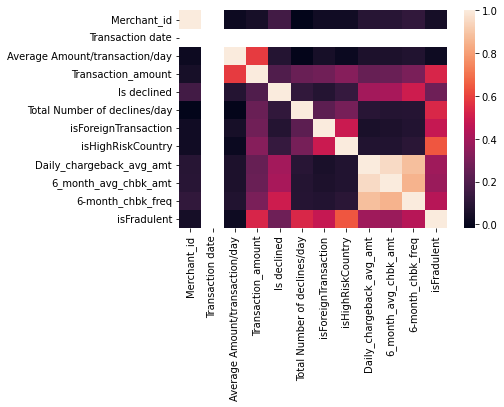

In [20]:
# view correlation
plt.figure()
sns.heatmap(df.corr())

In [21]:
#  preprocessing
# sklearn modules
from sklearn.model_selection import train_test_split


In [22]:
# create trainset and testset
trainset,testset=train_test_split(df,test_size=0.2,random_state=0)

In [23]:
# create X_train,y_train,X_test,y_test
def prepro(df):
    X=df.drop(["Transaction date","isFradulent"],axis=1)
    y=df["isFradulent"]
    return X,y

In [24]:
X_train,y_train=prepro(trainset)

In [25]:
X_test,y_test=prepro(testset)

In [26]:
# first modelling
# sklearn modules
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,Normalizer,PolynomialFeatures
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [27]:
# first model
svc=make_pipeline(StandardScaler(),SVC())

In [28]:
# evaluation function
def evalu(model):
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print("confusion matrix",confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    N,train_score,val_score=learning_curve(model,X_train,y_train,scoring="f1",train_sizes=np.linspace(0.1,1,10),cv=5)
    plt.figure()
    plt.plot(N,train_score.mean(axis=1),label="train_score")
    plt.plot(N,val_score.mean(axis=1),label="validation_score")
    plt.legend()



confusion matrix [[527   5]
 [  5  78]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       532
           1       0.94      0.94      0.94        83

    accuracy                           0.98       615
   macro avg       0.97      0.97      0.97       615
weighted avg       0.98      0.98      0.98       615



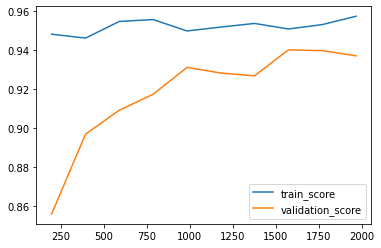

In [29]:
evalu(svc)

In [30]:
# evaluate other models
knn=make_pipeline(StandardScaler(),KNeighborsClassifier())
dt=make_pipeline(StandardScaler(),DecisionTreeClassifier())

confusion matrix [[526   6]
 [  7  76]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       532
           1       0.93      0.92      0.92        83

    accuracy                           0.98       615
   macro avg       0.96      0.95      0.95       615
weighted avg       0.98      0.98      0.98       615



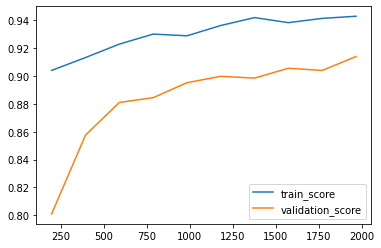

In [31]:
# KNN
evalu(knn)

confusion matrix [[523   9]
 [  6  77]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       532
           1       0.90      0.93      0.91        83

    accuracy                           0.98       615
   macro avg       0.94      0.96      0.95       615
weighted avg       0.98      0.98      0.98       615



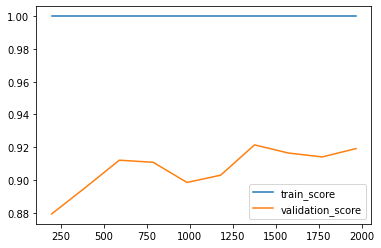

In [32]:
# Decision tree
evalu(dt)

In [33]:
# im decide to choose SVC for optimisation

In [34]:
# Optimisation

In [35]:
svc

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [36]:
param={
    "svc__C":[1.0,2.0,5.0,40.0,632.0],
    "svc__gamma":[1e-4,1e-5]
}

In [37]:
grid=GridSearchCV(svc,param,scoring="recall",cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'svc__C': 632.0, 'svc__gamma': 0.0001}


confusion matrix [[529   3]
 [  4  79]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       532
           1       0.96      0.95      0.96        83

    accuracy                           0.99       615
   macro avg       0.98      0.97      0.98       615
weighted avg       0.99      0.99      0.99       615



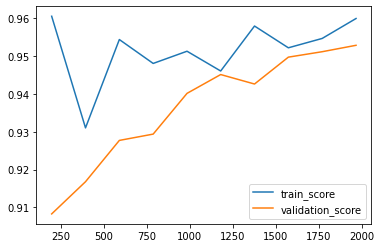

In [38]:
evalu(grid.best_estimator_)

In [39]:
# model final score
grid.best_estimator_.score(X_test,y_test)

0.9886178861788618

In [1]:
#